# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [38]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
weather_table = weather_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
headers = []
rows_data = []

# Loop through the scraped data to create a list of rows
for th in weather_table.find_all('th'):
    headers.append(th.text)

rows = weather_table.find('tbody').find_all('tr')    
for row in rows:
    cells = row.find_all('td')
    row_values = [cell.text for cell in cells]
    rows_data.append(row_values)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
filter_row = rows_data[1:]
mars_df = pd.DataFrame(filter_row, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
mars_df['month'].nunique()

12

In [24]:
# 2. How many sols (Martian days) worth of data are there?
mars_df['sol'].nunique()

1867

In [26]:
# 3. What is the average minimum temperature by month?
temp_by_month = mars_df.groupby('month')['min_temp'].mean()
temp_by_month_df = temp_by_month.reset_index()
print(temp_by_month_df)

    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


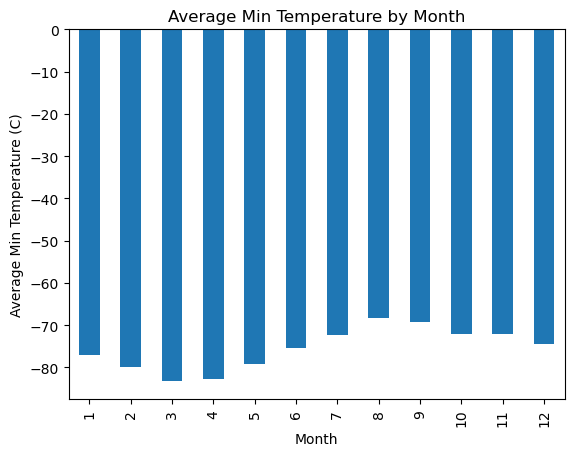

In [27]:
# Plot the average minimum temperature by month
temp_by_month.plot(x='month', y='min_temp', kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (C)')
plt.title('Average Min Temperature by Month')
plt.show()

In [32]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = temp_by_month.idxmin()
hottest_month = temp_by_month.idxmax()

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

Coldest month: 3
Hottest month: 8


In [34]:
# 4. What is the average pressure by month?
pressure_by_month = mars_df.groupby('month')['pressure'].mean()
pressure_by_month_df = pressure_by_month.reset_index()

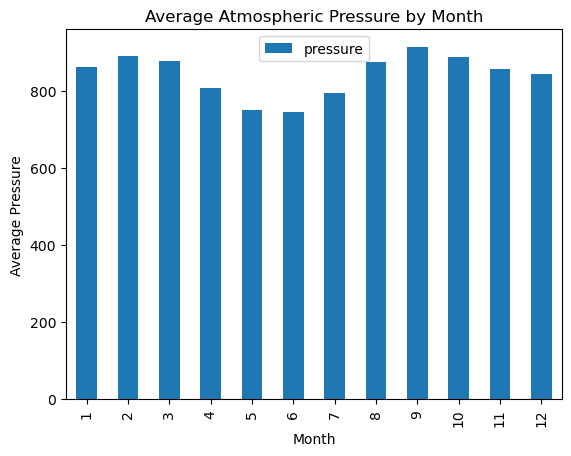

In [35]:
# Plot the average pressure by month
pressure_by_month_df.plot(x='month', y='pressure', kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Atmospheric Pressure by Month')
plt.show()

In [36]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
low_pressure = pressure_by_month.idxmin()
high_pressure = pressure_by_month.idxmax()

print("Low pressure:", low_pressure)
print("High pressure:", high_pressure)

Low pressure: 6
High pressure: 9


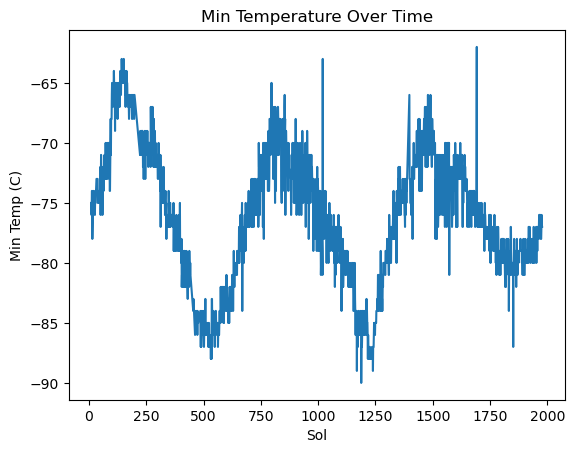

In [40]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.xlabel('Sol')
plt.ylabel('Min Temp (C)')
plt.title('Min Temperature Over Time')
plt.show()

#### Minimum Temperature

Coldest month: 3
Hottest month: 8

#### Atmospheric Pressure

Low pressure month: 6
High pressure month: 9

#### Year Length

Year lengt: 600-650 earth days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
mars_df.to_csv('mars_weather.csv', index=False)

In [42]:
browser.quit()